# <center><font color=15D77D>Task 7 : Stock Market Prediction using Numerical and Textual Analysis</font></center>

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### <center><font color=166E64>Author </font><font color=15D77D>: </font><font color=5B1746>Ravikiran S Basutkar</font></center>
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#GRIPAPRIL21
#TSF </font><font color=AB3988> THE SPARK FOUNDATION

### <center><font color=166E64>Objective: </font><font color=AB3988>Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines</font>


In [1]:
#!pip install pandas_datareader

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

# For time stamps
from datetime import datetime

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense, Activation
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer as ps
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#Fetching and Reading Data

In [3]:
#the tech companies Amazon stocks we'll use for this analysis
end = datetime.now()
start = datetime(end.year - 4, end.month, end.day)

globals()['AMZN'] = DataReader('AMZN', 'yahoo', start, end)

In [4]:
data_stockprice=AMZN.copy()
data_stockprice.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-19,910.500000,897.369995,907.840027,899.200012,2870200,899.200012
2017-04-20,905.320007,896.289978,899.700012,902.059998,2814400,902.059998
2017-04-21,903.650024,896.770020,902.669983,898.530029,2420500,898.530029
2017-04-24,909.989990,903.820007,908.679993,907.409973,3122900,907.409973
2017-04-25,909.479980,903.000000,907.039978,907.619995,3380600,907.619995


In [5]:
# Summary Stats Amazon stocks
data_stockprice.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03,1008.000000
mean,1965.346873,1920.710427,1944.514673,1943.658609,4.500525e+06,1943.658609
std,732.534532,711.426311,722.689255,721.526649,2.143127e+06,721.526649
min,903.650024,896.289978,899.700012,898.530029,4.318380e+05,898.530029
25%,1547.475006,1502.972504,1530.000000,1520.172516,3.021500e+06,1520.172516
50%,1805.835022,1776.325012,1793.420044,1792.424988,3.930750e+06,1792.424988
75%,2358.697449,2286.244934,2331.707520,2316.442505,5.371725e+06,2316.442505
max,3552.250000,3486.689941,3547.000000,3531.449951,1.656500e+07,3531.449951


In [6]:
# General Amazon stocks info
data_stockprice.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2017-04-19 to 2021-04-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1008 non-null   float64
 1   Low        1008 non-null   float64
 2   Open       1008 non-null   float64
 3   Close      1008 non-null   float64
 4   Volume     1008 non-null   int64  
 5   Adj Close  1008 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 55.1 KB


In [7]:
list_columns = data_stockprice.columns
list_columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

Text(0.5, 1.0, 'AMAZON')

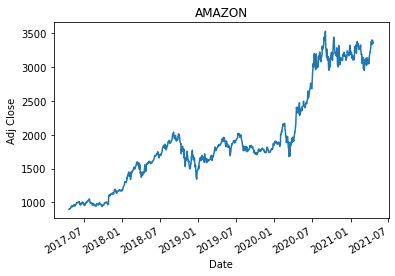

In [8]:
data_stockprice['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel('Date')
plt.title('AMAZON')

In [9]:
#History of trading open price:

Text(0.5, 1.0, 'Open Price History')

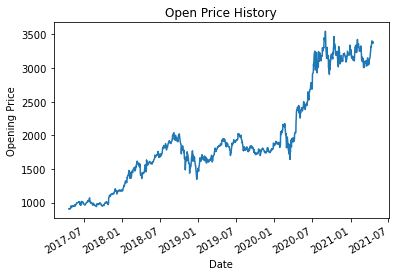

In [10]:
data_stockprice['Open'].plot()
plt.ylabel('Opening Price')
plt.xlabel('Date')
plt.title('Open Price History')

In [11]:
#History of trading close price:

Text(0.5, 1.0, 'Close Price History')

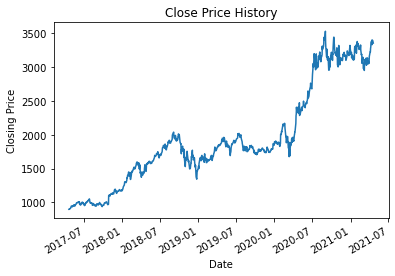

In [12]:
data_stockprice['Close'].plot()
plt.ylabel('Closing Price')
plt.xlabel('Date')
plt.title('Close Price History')

#The total volume of stock being traded each day

Text(0.5, 1.0, 'Volume of stock traded')

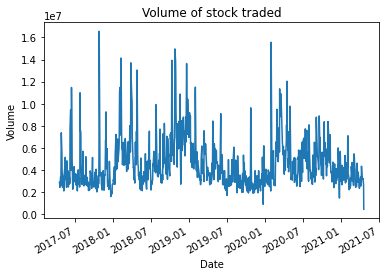

In [13]:
data_stockprice['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel('Date')
plt.title('Volume of stock traded')

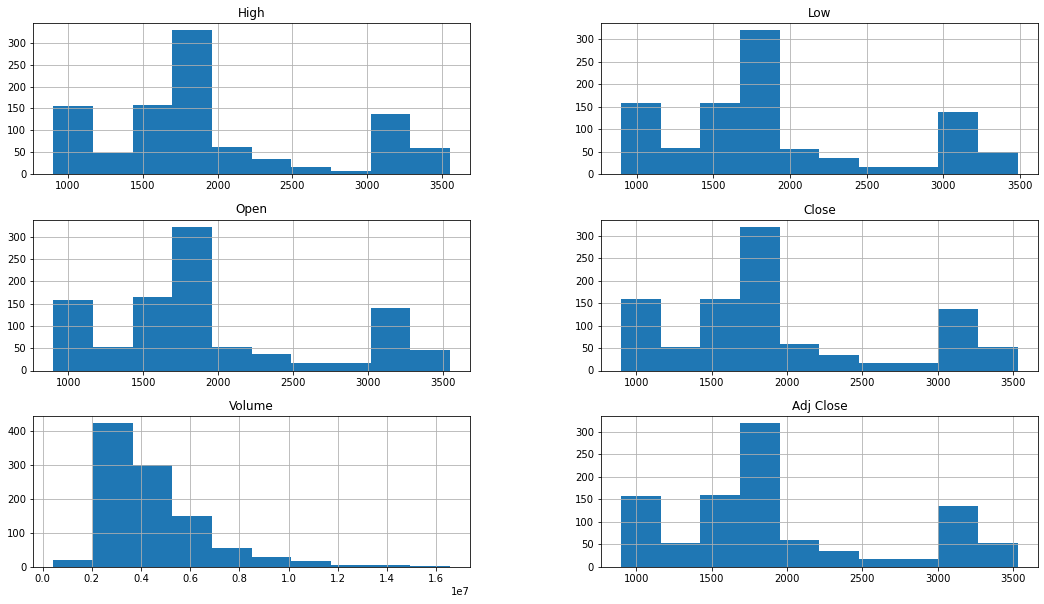

In [14]:
data_stockprice.hist(figsize=(18, 10));

In [15]:
#Plotting moving average

In [16]:
moving_avg_day = [10, 20, 50]

for mv_avg in moving_avg_day:
    column_name = f"MA for {mv_avg} days"
    data_stockprice[column_name] = data_stockprice['Adj Close'].rolling(mv_avg).mean()

In [17]:
print(data_stockprice.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'MA for 10 days',
       'MA for 20 days', 'MA for 50 days'],
      dtype='object')


<Figure size 576x1440 with 0 Axes>

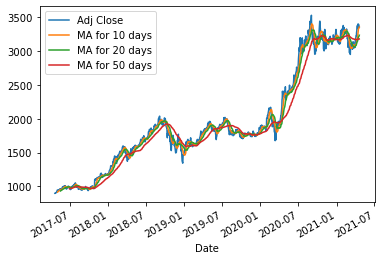

In [18]:
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(20)
data_stockprice[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.show()

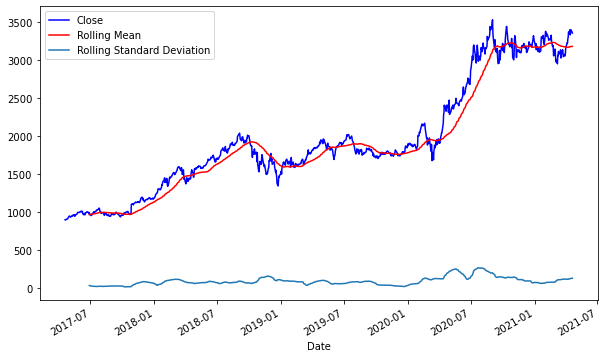

In [19]:
#Plotting moving average
close = data_stockprice['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
data_stockprice['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

In [20]:
#train test split sequentially in 80:20
train_size=int(len(data_stockprice)*0.8)

train = data_stockprice[:train_size]
test = data_stockprice[train_size:]


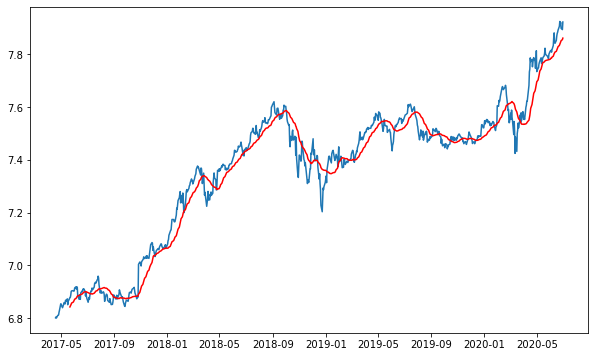

In [21]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (10,6))
plt.plot(train_log) 
plt.plot(mav, color = 'red') 

In [22]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

In [23]:
#!pip install pmdarima

In [24]:
#Using auto arima to make predictions using log data
from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4070.594, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4074.998, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4076.594, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4076.573, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4072.777, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-4074.594, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4074.594, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4072.586, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-4073.811, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.828 seconds


Text(0, 0.5, 'Actual Stock Price')

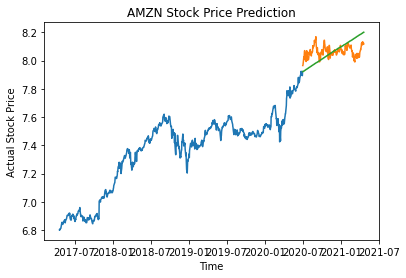

In [25]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

In [26]:
#Stock price prediction using LSTM and SVM

In [27]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense, Activation
from sklearn import svm

In [28]:
training_set=train.iloc[:, 3:4].values
training_set
testing_set=test.iloc[:, 3:4].values

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = scaler.fit_transform(training_set)
new_data=pd.DataFrame(scaler.fit_transform(testing_set))

In [30]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [31]:
#Stock price prediction using LSTM

In [32]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=1)



746/746 [==============================] - 17s 19ms/step - loss: 0.0089


In [33]:
# saving the model as a json file
model_json = model.to_json()
with open('../model.json', 'w') as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights('../model.h5')
print('Model is saved to the disk')

Model is saved to the disk


In [34]:
#predicting stock price
dataset_total = pd.concat((pd.DataFrame(training_set), pd.DataFrame(testing_set)), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testing_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [35]:
rms=np.sqrt(np.mean(np.power((testing_set-closing_price),2)))
rms

105.12945816903937

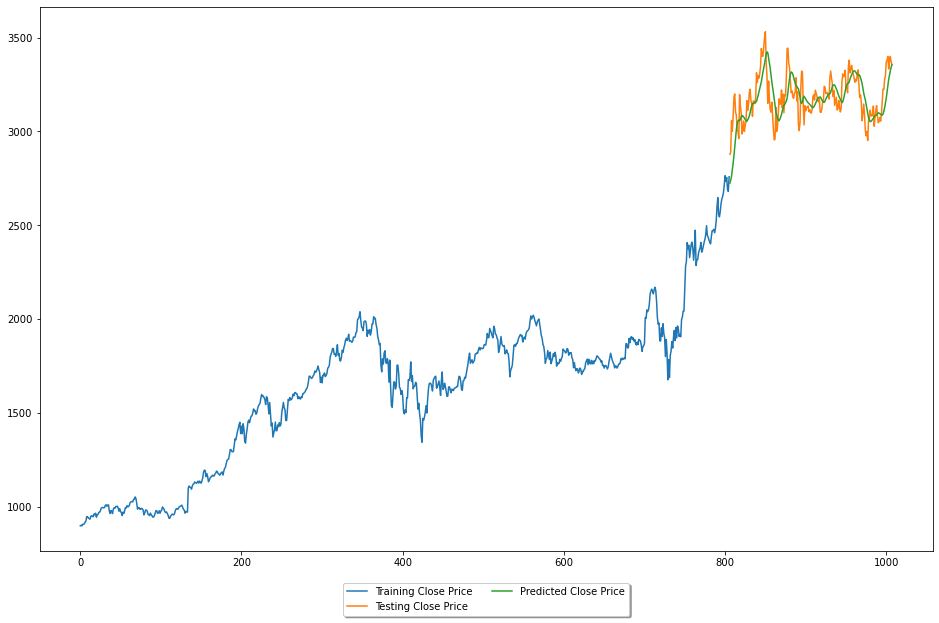

In [36]:
#for plotting
train = dataset_total[:train_size]
train.columns =['Close'] 
valid = dataset_total[train_size:]
valid.columns =['Close'] 
valid['Predictions'] = closing_price
time=range(len(dataset_total))

plt.figure(figsize=(16,10))
plt.plot(time[:train_size],train['Close'], label="Training Close Price")
plt.plot(time[train_size:],valid['Close'], label="Testing Close Price")
plt.plot(time[train_size:],valid['Predictions'], label="Predicted Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

## Performing Sentiment Analysis over the news Headlines

In [37]:
df=pd.read_csv("IndianFinancialNews.csv")

In [38]:
df.head(10)

,Unnamed: 0,Date,Title,Description
0,0,"May 26, 2020, Tuesday","ATMs to become virtual bank branches, accept d...","Close to 14.6 per cent (or 35,000) of the 240,..."
1,1,"May 26, 2020, Tuesday",IDFC First Bank seniors to forgo 65% of bonus ...,"V Vaidyanathan, managing director and chief ex..."
2,2,"May 25, 2020, Monday","Huge scam in YES Bank for many years, says Enf...",Rana Kapoor's wife also charged with abetting ...
3,3,"May 24, 2020, Sunday","Bank of Maharashtra sanctioned Rs 2,789 cr in ...",The bank said it was now gearing up to extend ...
4,4,"May 23, 2020, Saturday",DCB Bank's profit before tax declines 37.6% to...,Net profit for the financial year ended March ...
5,5,"May 23, 2020, Saturday","Bank of Baroda to advance Rs 12,000 crore to M...","Under the scheme, the government will offer 10..."
6,6,"May 22, 2020, Friday","Retail, MSME loans to get cheaper as RBI cuts ...",HDFC Bank cuts base rate by 55 bps; SBI calls ...
7,7,"May 22, 2020, Friday","RBI forecasts economic contraction, announces ...",The six-member MPC also kept policy stance unc...
8,8,"May 22, 2020, Friday","RBI extends loan moratorium till Aug 31, silen...",The central bank has increased group exposure ...
9,9,"May 22, 2020, Friday","Govt seeks to raise Rs 14,000 cr from second t...",Two new series will have maturities of April 2...


In [39]:
df['Date'] = pd.to_datetime(df['Date']).dt.normalize()

In [40]:
df.drop('Unnamed: 0',  axis = 1,inplace=True)
df.head(10)

,Date,Title,Description
0,2020-05-26,"ATMs to become virtual bank branches, accept d...","Close to 14.6 per cent (or 35,000) of the 240,..."
1,2020-05-26,IDFC First Bank seniors to forgo 65% of bonus ...,"V Vaidyanathan, managing director and chief ex..."
2,2020-05-25,"Huge scam in YES Bank for many years, says Enf...",Rana Kapoor's wife also charged with abetting ...
3,2020-05-24,"Bank of Maharashtra sanctioned Rs 2,789 cr in ...",The bank said it was now gearing up to extend ...
4,2020-05-23,DCB Bank's profit before tax declines 37.6% to...,Net profit for the financial year ended March ...
5,2020-05-23,"Bank of Baroda to advance Rs 12,000 crore to M...","Under the scheme, the government will offer 10..."
6,2020-05-22,"Retail, MSME loans to get cheaper as RBI cuts ...",HDFC Bank cuts base rate by 55 bps; SBI calls ...
7,2020-05-22,"RBI forecasts economic contraction, announces ...",The six-member MPC also kept policy stance unc...
8,2020-05-22,"RBI extends loan moratorium till Aug 31, silen...",The central bank has increased group exposure ...
9,2020-05-22,"Govt seeks to raise Rs 14,000 cr from second t...",Two new series will have maturities of April 2...


In [41]:
df_news=df.iloc[:,0:2]
df_news=df_news.rename(columns={"Title":"News"})
df_news

,Date,News
0,2020-05-26,"ATMs to become virtual bank branches, accept d..."
1,2020-05-26,IDFC First Bank seniors to forgo 65% of bonus ...
2,2020-05-25,"Huge scam in YES Bank for many years, says Enf..."
3,2020-05-24,"Bank of Maharashtra sanctioned Rs 2,789 cr in ..."
4,2020-05-23,DCB Bank's profit before tax declines 37.6% to...
...,...,...
49995,2003-02-11,Lic Mops Up Government Securities As Prices Crash
49996,2003-02-11,Banks Plan To Raise Lending Rates Without Alte...
49997,2003-02-10,"Net Scheduled Inflows Of Rs 1,559.9 Crore"
49998,2003-02-10,Rbi Calls Meet To Push Floating Rate Deposits


### Sentiment Analysis of news headlines

In [42]:
# importing requires libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [43]:
#Cleaning headlines
c = []
for i in range(0,len(df_news['News'])):
    news = re.sub('[^a-zA-Z]',' ',df_news['News'][i])
    news = news.lower()
    news = news.split()
    news = [(word) for word in news if not word in set(stopwords.words('english'))]
    news=' '.join(news)
    c.append(news)
#df_news['News'] = pd.Series(c)

In [44]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [45]:
#Adding subjectivity and polarity columns
df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
df_news['Polarity'] = df_news['News'].apply(getPolarity)
df_news

,Date,News,Subjectivity,Polarity
0,2020-05-26,"ATMs to become virtual bank branches, accept d...",0.666667,0.00
1,2020-05-26,IDFC First Bank seniors to forgo 65% of bonus ...,0.333333,0.25
2,2020-05-25,"Huge scam in YES Bank for many years, says Enf...",0.700000,0.45
3,2020-05-24,"Bank of Maharashtra sanctioned Rs 2,789 cr in ...",0.000000,0.00
4,2020-05-23,DCB Bank's profit before tax declines 37.6% to...,0.000000,0.00
...,...,...,...,...
49995,2003-02-11,Lic Mops Up Government Securities As Prices Crash,0.000000,0.00
49996,2003-02-11,Banks Plan To Raise Lending Rates Without Alte...,0.000000,0.00
49997,2003-02-10,"Net Scheduled Inflows Of Rs 1,559.9 Crore",0.000000,0.00
49998,2003-02-10,Rbi Calls Meet To Push Floating Rate Deposits,0.000000,0.00


<AxesSubplot:>

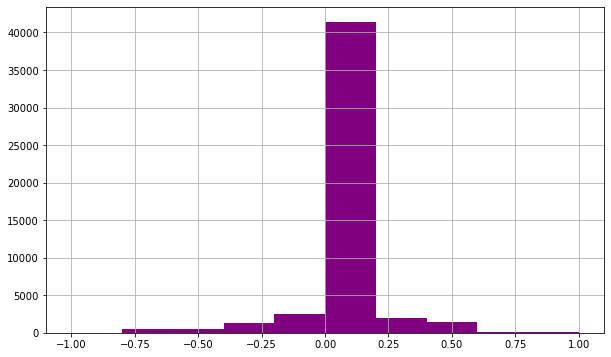

In [46]:
plt.figure(figsize = (10,6))
df_news['Polarity'].hist(color = 'purple')

In [47]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['News']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['News']]
df_news

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2020-05-26,"ATMs to become virtual bank branches, accept d...",0.666667,0.00,0.6369,0.000,0.634,0.366
1,2020-05-26,IDFC First Bank seniors to forgo 65% of bonus ...,0.333333,0.25,-0.1531,0.233,0.568,0.199
2,2020-05-25,"Huge scam in YES Bank for many years, says Enf...",0.700000,0.45,0.2577,0.212,0.459,0.329
3,2020-05-24,"Bank of Maharashtra sanctioned Rs 2,789 cr in ...",0.000000,0.00,0.0000,0.000,1.000,0.000
4,2020-05-23,DCB Bank's profit before tax declines 37.6% to...,0.000000,0.00,0.4404,0.000,0.805,0.195
...,...,...,...,...,...,...,...,...
49995,2003-02-11,Lic Mops Up Government Securities As Prices Crash,0.000000,0.00,-0.1280,0.248,0.550,0.202
49996,2003-02-11,Banks Plan To Raise Lending Rates Without Alte...,0.000000,0.00,0.0000,0.000,1.000,0.000
49997,2003-02-10,"Net Scheduled Inflows Of Rs 1,559.9 Crore",0.000000,0.00,0.0000,0.000,1.000,0.000
49998,2003-02-10,Rbi Calls Meet To Push Floating Rate Deposits,0.000000,0.00,0.0000,0.000,1.000,0.000


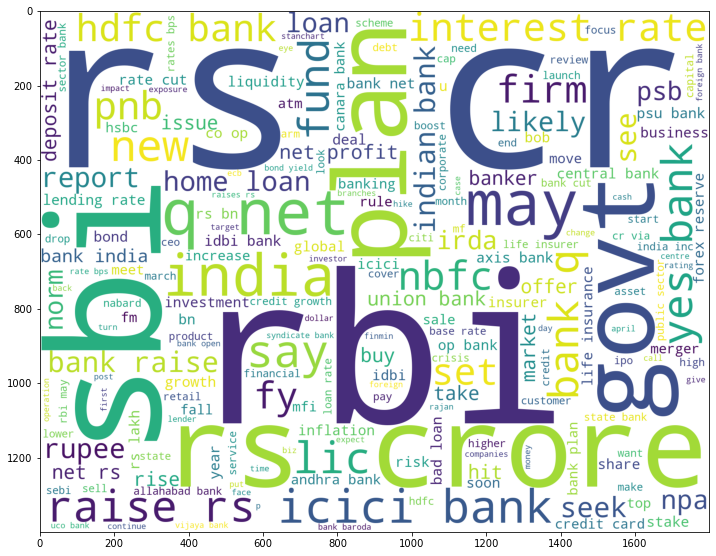

In [48]:
ip_new_string = " ".join(c)
wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_new_string)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud_ip)

In [49]:
df_news.columns

Index(['Date', 'News', 'Subjectivity', 'Polarity', 'Compound', 'Negative',
       'Neutral', 'Positive'],
      dtype='object')

<AxesSubplot:>

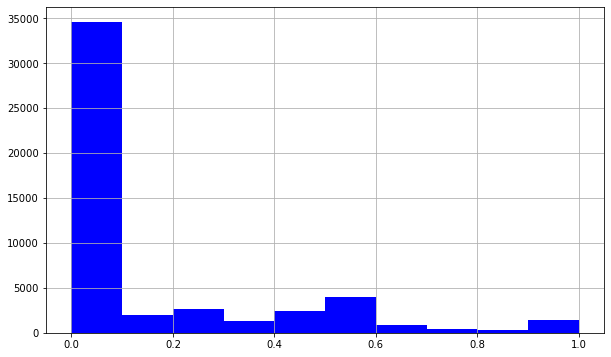

In [50]:
plt.figure(figsize = (10,6))
df_news['Subjectivity'].hist(color = 'blue')

In [51]:
df_news.head(10)

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2020-05-26,"ATMs to become virtual bank branches, accept d...",0.666667,0.0000,0.6369,0.000,0.634,0.366
1,2020-05-26,IDFC First Bank seniors to forgo 65% of bonus ...,0.333333,0.2500,-0.1531,0.233,0.568,0.199
2,2020-05-25,"Huge scam in YES Bank for many years, says Enf...",0.700000,0.4500,0.2577,0.212,0.459,0.329
3,2020-05-24,"Bank of Maharashtra sanctioned Rs 2,789 cr in ...",0.000000,0.0000,0.0000,0.000,1.000,0.000
4,2020-05-23,DCB Bank's profit before tax declines 37.6% to...,0.000000,0.0000,0.4404,0.000,0.805,0.195
5,2020-05-23,"Bank of Baroda to advance Rs 12,000 crore to M...",0.000000,0.0000,0.0000,0.000,1.000,0.000
6,2020-05-22,"Retail, MSME loans to get cheaper as RBI cuts ...",0.100000,0.1000,-0.0258,0.135,0.736,0.129
7,2020-05-22,"RBI forecasts economic contraction, announces ...",0.475000,0.0375,-0.2732,0.208,0.792,0.000
8,2020-05-22,"RBI extends loan moratorium till Aug 31, silen...",0.100000,0.0000,0.1280,0.000,0.870,0.130
9,2020-05-22,"Govt seeks to raise Rs 14,000 cr from second t...",0.000000,0.0000,0.0000,0.000,1.000,0.000


### Thanks :)